In [1]:
from specim.specfuncs import spec1d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =  spec1d.Spec1d('../0712_G0594_001_1d.txt')


Reading spectrum from ../0712_G0594_001_1d.txt
Expected file format: text
 Spectrum Start:     0.00
 Spectrum End:     2045.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00



In [3]:
pixel_gal = data['wav']
spectra_gal = data['flux']
var_spec_gal = data['var']
sky_spec = data['sky']
#lamda_galaxy_range =  [np.min(lamda_galaxy), np.max(lamda_galaxy)]

<IPython.core.display.Javascript object>


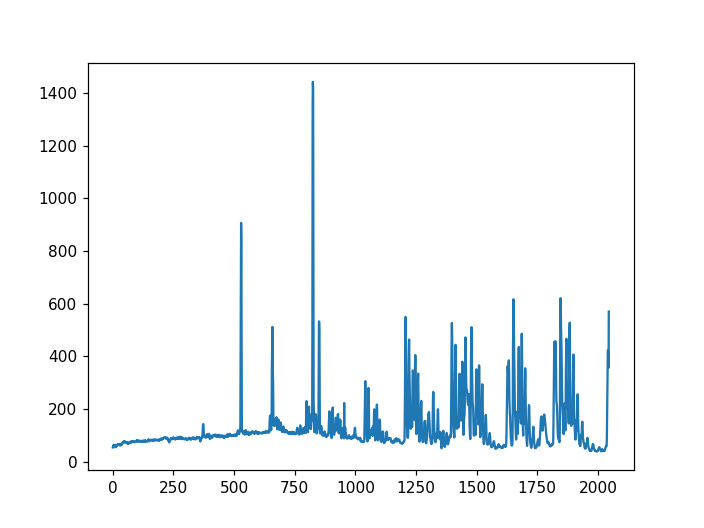

In [4]:
%matplotlib notebook
plt.plot(pixel_gal, sky_spec)

In [26]:
 wav_calb = [(5197.8, 372.5), (5577.0, 528.7), (5889.80, 658.03), (6299.0, 825.0), (6369.0, 850.4), 
            (6498.73, 906.98), (6863.98, 1040.56),
            (7276.39, 1206.39), (7523.94, 1320.72), (7571.62, 1340.21),
            (7750.62, 1397.55), (7913.58, 1479.0), (8344.61, 1651.46),
            (8827.01,1845.29)] # (6553.61, 954.0)

In [52]:
wav_calb = [(5197.8, 372.5), (5577.0, 528.7), (5889.80, 658.03), (6299.0, 825.0), (6369.0, 850.4), 
            (6498.73, 906.98), (6833.98, 1040.56),
            (7245.39, 1206.39), (7516.94, 1320.72), (7565.62, 1340.21),
            (7715.62, 1397.55), (7913.58, 1479.0), (8344.61, 1651.46),
            (8827.01,1845.29)] # (6553.61, 954.0)

In [6]:
sky_data = np.loadtxt('sky_lines.dat')
sky_wav = sky_data[:, 0]
sky_height = sky_data[:, 1]

In [121]:
from scipy import signal

In [130]:
corr = signal.correlate(sky_height[:2490], sky_spec, mode='same', method='fft' )

<IPython.core.display.Javascript object>


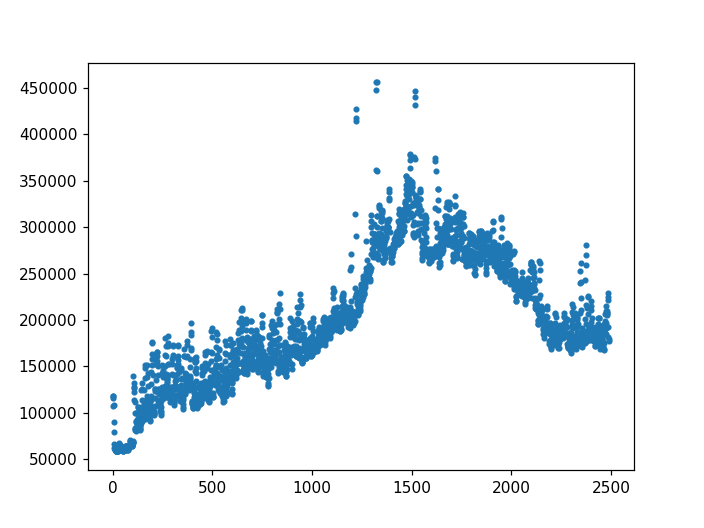

In [131]:
plt.plot(corr, '.')

In [119]:
print(len(pixel_gal))
print(len(sky_wav))
s = sky_wav.tolist()
for i, p in enumerate(s):
    if p>9305.0:
        print(s.index(p))
        break

2046
2795
2488


<IPython.core.display.Javascript object>


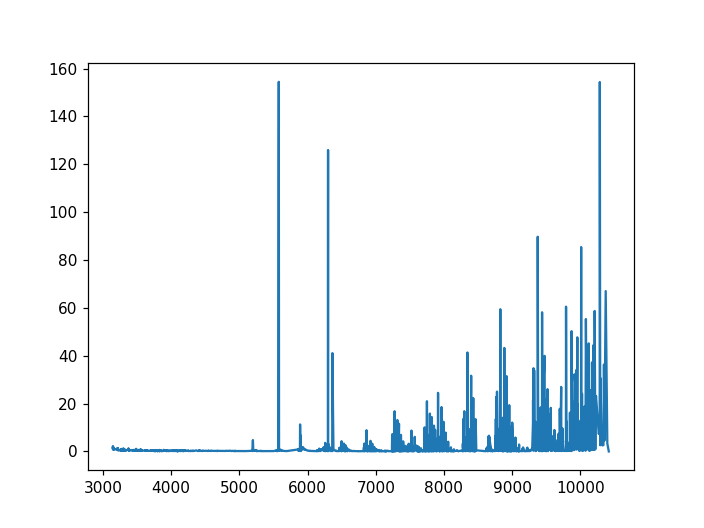

In [7]:
#plt.plot(sky_wav[:2488], sky_height[:2488])
plt.plot(sky_wav, sky_height)
#print(sky_height)

In [82]:
wav_gs = np.zeros(len(wav_calb))
pix_gs = np.zeros(len(wav_calb))
for i, s in enumerate(wav_calb):
    wav_gs[i] = s[0]
    pix_gs[i] = s[1]

param_3 = np.polyfit(pix_gs, wav_gs, deg=3)
wav_fit_3 = np.polyval(param_3, pixel_gal)

param_4 = np.polyfit(pix_gs, wav_gs, deg=4)
wav_fit_4 = np.polyval(param_4, pixel_gal)

param_5 = np.polyfit(pix_gs, wav_gs, deg=5)
wav_fit_5 = np.polyval(param_5, pixel_gal)

param_6 = np.polyfit(pix_gs, wav_gs, deg=6)
wav_fit_6 = np.polyval(param_6, pixel_gal)

<IPython.core.display.Javascript object>


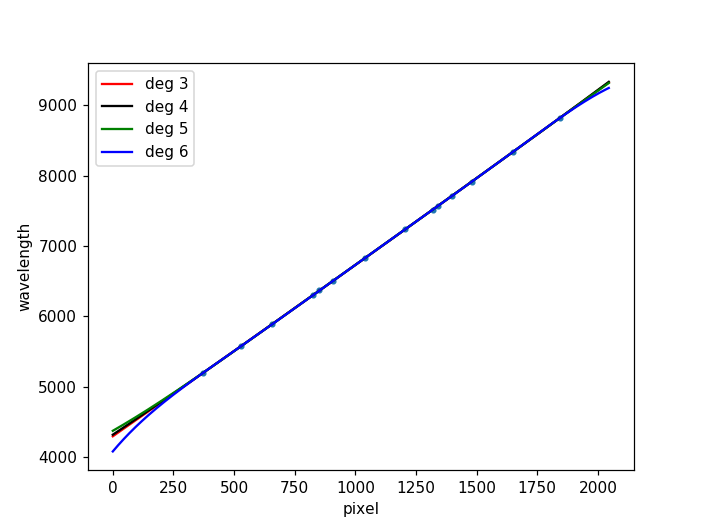

Text(0, 0.5, 'wavelength')

In [84]:
plt.plot(pix_gs, wav_gs, '.')
plt.plot(pixel_gal, wav_fit_3, 'r', label='deg 3')
plt.plot(pixel_gal, wav_fit_4, 'k', label='deg 4')
plt.plot(pixel_gal, wav_fit_5, 'g', label='deg 5')
plt.plot(pixel_gal, wav_fit_6, 'b', label='deg 6')
plt.legend()
plt.xlabel('pixel')
plt.ylabel('wavelength')

<IPython.core.display.Javascript object>


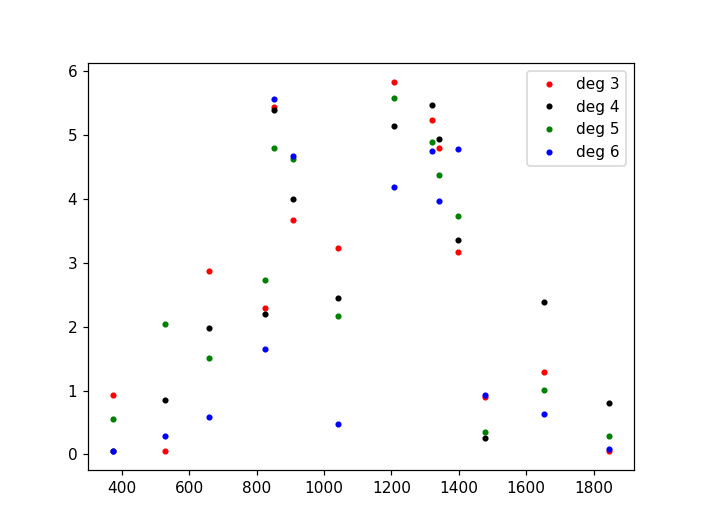

In [89]:
wav_fit_gs_3 = np.polyval(param_3, pix_gs)

wav_fit_gs_4 = np.polyval(param_4, pix_gs)

wav_fit_gs_5 = np.polyval(param_5, pix_gs)

wav_fit_gs_6 = np.polyval(param_6, pix_gs)

plt.plot(pix_gs, abs(wav_fit_gs_3 - wav_gs), 'r.', label='deg 3')

plt.plot(pix_gs, abs(wav_fit_gs_4 - wav_gs), 'k.', label='deg 4')

plt.plot(pix_gs, abs(wav_fit_gs_5 - wav_gs), 'g.', label='deg 5')

plt.plot(pix_gs, abs(wav_fit_gs_6 - wav_gs), 'b.', label='deg 6')

plt.legend()

In [91]:
data['wav'] = wav_fit_3

In [92]:
print(data)

       wav           flux     var      sky 
------------------ ------- ---------- -----
4294.6217772962755  55.681  1793.5783  54.0
 4297.035732116827 135.212  1984.1689  56.0
 4299.449730550835  59.776  2008.1196  61.0
 4301.863772601919 132.477  2139.7124  61.0
   4304.2778582737  68.185   2107.677  64.0
 4306.691987569797  125.73  2056.4611  59.0
 4309.106160493829  74.753  1965.5178  59.0
4311.5203770494145  71.502  1985.4405  60.0
 4313.934637240175 185.189  2173.4484  59.0
 4316.348941069729 -26.694  1922.9044  64.0
               ...     ...        ...   ...
 9302.358383719547  77.052  1432.0939  59.0
 9304.868582855706  44.487  1368.1781  59.0
 9307.378832971035  38.993  1976.8146  87.0
 9309.889134069155 124.339  3947.2326 170.0
 9312.399486153683 122.027  5507.0568 242.0
 9314.909889228242  137.92  8161.0438 361.0
 9317.420343296448 173.732  9582.3369 423.0
 9319.930848361922 182.586  9586.3988 422.0
 9322.441404428282  69.859  9082.2354 408.0
 9324.952011499154 160.617  8100

<IPython.core.display.Javascript object>


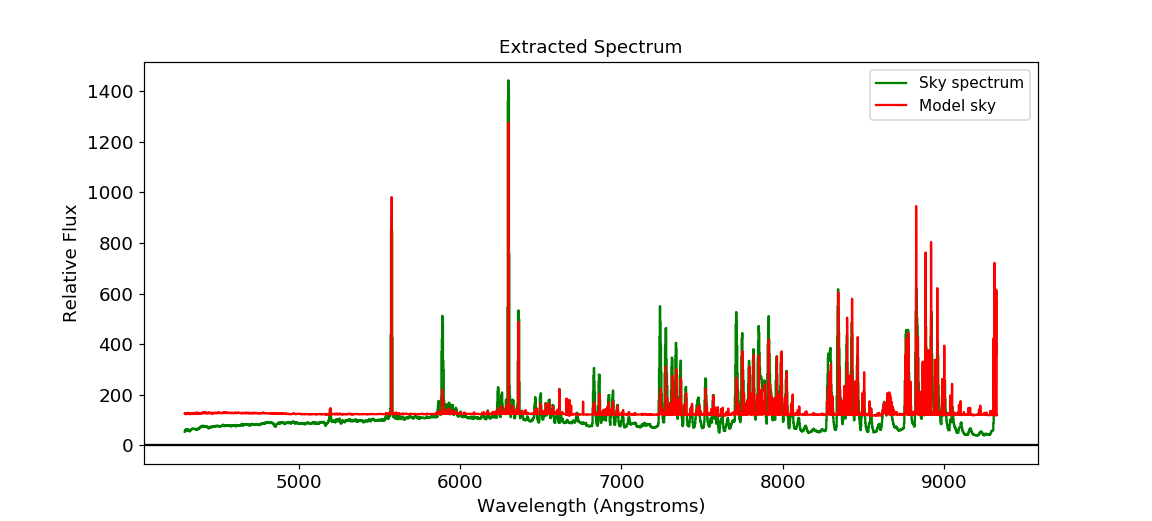


Smoothing sky spectrum with default value of  2.550 Ang

/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 4294.621777
Model ending wavelength:    9327.462670
Model dispersion:             2.413955
 Spectrum Start:  4294.62
 Spectrum End:     9327.42
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1544.4 16.389546929041323
129.60361681329422 0.18800507576348574


In [94]:
data.check_wavecal()

<IPython.core.display.Javascript object>


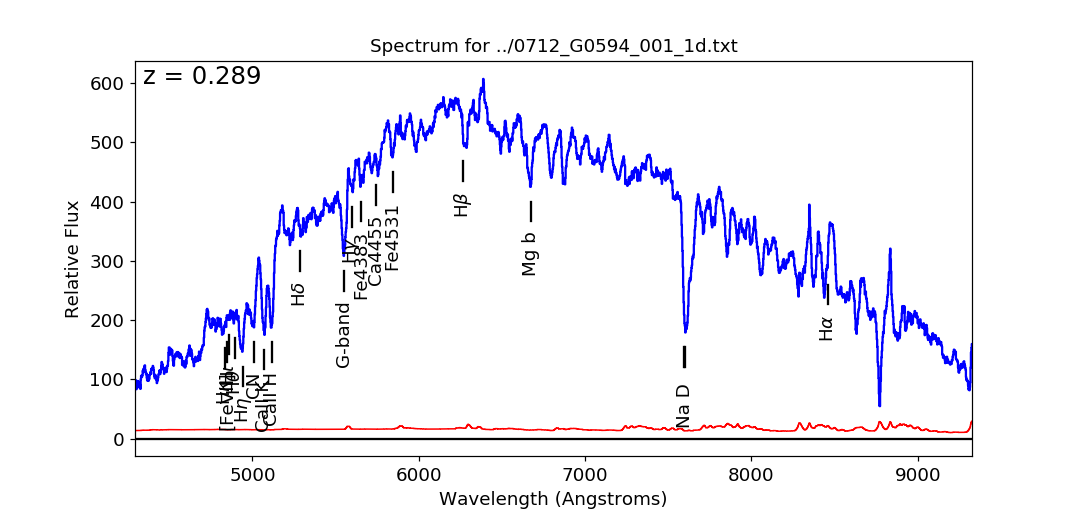


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       4835.62
[Fe VII]      3761.40       4850.33
H-iota        3770.00       4861.41
H-theta       3797.00       4896.23
H-eta         3835.00       4945.23
CN bandhd     3883.00       5007.13
CaII K        3933.67       5072.47
CaII H        3968.47       5117.34
H-delta       4101.00       5288.24
G-band        4305.00       5551.30
H-gamma       4340.00       5596.43
Fe4383        4383.00       5651.88
Ca4455        4455.00       5744.72
Fe4531        4531.00       5842.72
H-beta        4861.00       6268.26
Mg I (b)      5176.00       6674.45
Na I (D)      5889.95       7595.09
Na I (D)      5895.92       7602.79
H-alpha       6562.80       8462.73



In [95]:
data.smooth(11)
data.mark_lines('abs', z=0.2895, usesmooth=True)

In [110]:
data['wav'] = wav_fit_4

In [111]:
print(data)

       wav           flux     var      sky 
------------------ ------- ---------- -----
 4317.159811388595  55.681  1793.5783  54.0
 4319.464957106041 135.212  1984.1689  56.0
 4321.770496273298  59.776  2008.1196  61.0
 4324.076428212137 132.477  2139.7124  61.0
 4326.382752244946  68.185   2107.677  64.0
 4328.689467694726  125.73  2056.4611  59.0
 4330.996573885096  74.753  1965.5178  59.0
 4333.304070140291  71.502  1985.4405  60.0
  4335.61195578516 185.189  2173.4484  59.0
4337.9202301451705 -26.694  1922.9044  64.0
               ...     ...        ...   ...
 9310.031055159052  77.052  1432.0939  59.0
  9312.59705279603  44.487  1368.1781  59.0
 9315.163338415374  38.993  1976.8146  87.0
 9317.729912592271 124.339  3947.2326 170.0
 9320.296775902529 122.027  5507.0568 242.0
 9322.863928922572  137.92  8161.0438 361.0
 9325.431372229441 173.732  9582.3369 423.0
 9327.999106400788 182.586  9586.3988 422.0
 9330.567132014887  69.859  9082.2354 408.0
 9333.135449650625 160.617  8100

<IPython.core.display.Javascript object>


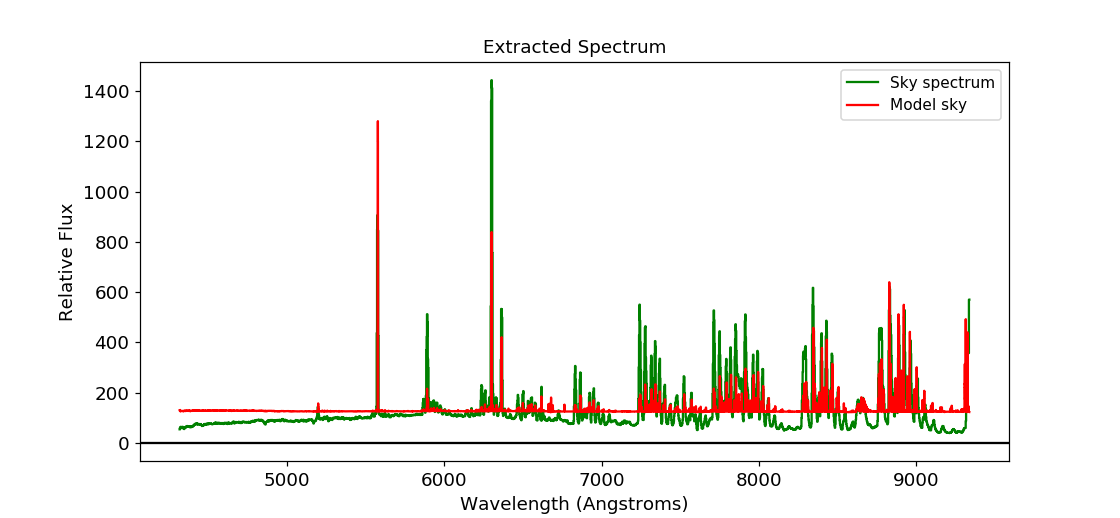


Smoothing sky spectrum with default value of  2.550 Ang

/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 4317.159811
Model ending wavelength:    9335.704060
Model dispersion:             2.305146
 Spectrum Start:  4317.16
 Spectrum End:     9335.56
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1544.4 25.872485048118932
129.60361681329422 0.19172842770113524


In [98]:
data.check_wavecal()

<IPython.core.display.Javascript object>


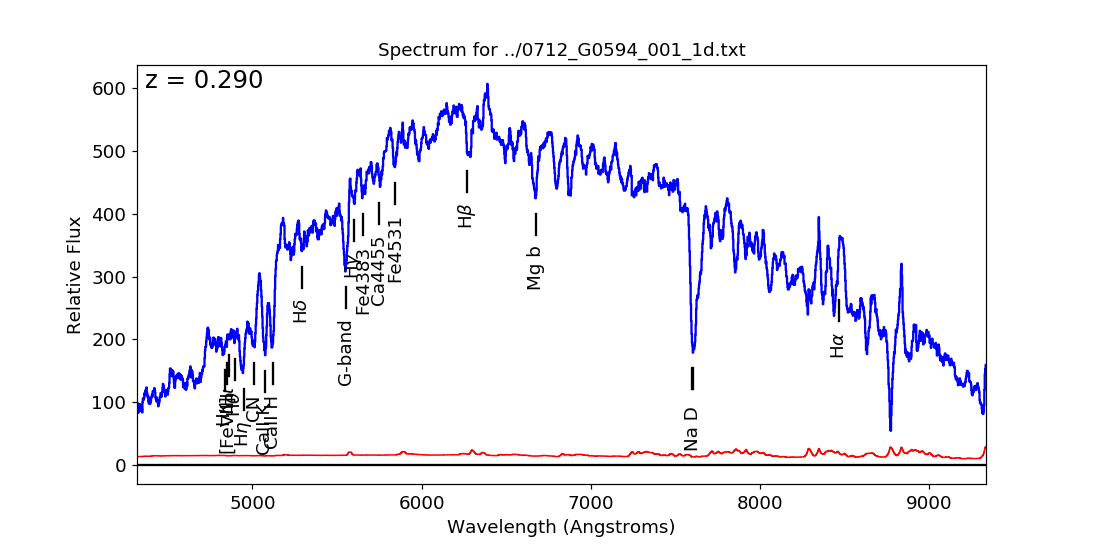


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       4837.50
[Fe VII]      3761.40       4852.21
H-iota        3770.00       4863.30
H-theta       3797.00       4898.13
H-eta         3835.00       4947.15
CN bandhd     3883.00       5009.07
CaII K        3933.67       5074.43
CaII H        3968.47       5119.33
H-delta       4101.00       5290.29
G-band        4305.00       5553.45
H-gamma       4340.00       5598.60
Fe4383        4383.00       5654.07
Ca4455        4455.00       5746.95
Fe4531        4531.00       5844.99
H-beta        4861.00       6270.69
Mg I (b)      5176.00       6677.04
Na I (D)      5889.95       7598.04
Na I (D)      5895.92       7605.74
H-alpha       6562.80       8466.01



In [99]:
data.smooth(11)
data.mark_lines('abs', z=0.290, usesmooth=True)

In [100]:
data['wav'] = wav_fit_5

In [101]:
print(data)

       wav           flux     var      sky 
------------------ ------- ---------- -----
 4372.775663358668  55.681  1793.5783  54.0
 4374.745046695503 135.212  1984.1689  56.0
4376.7163042909815  59.776  2008.1196  61.0
4378.6894309256195 132.477  2139.7124  61.0
 4380.664421389261  68.185   2107.677  64.0
 4382.641270481071  125.73  2056.4611  59.0
 4384.619973009525  74.753  1965.5178  59.0
4386.6005237924055  71.502  1985.4405  60.0
 4388.582917656789 185.189  2173.4484  59.0
 4390.567149439039 -26.694  1922.9044  64.0
               ...     ...        ...   ...
 9294.445831349007  77.052  1432.0939  59.0
 9296.870555239595  44.487  1368.1781  59.0
 9299.294736459677  38.993  1976.8146  87.0
 9301.718372391832 124.339  3947.2326 170.0
 9304.141460411876 122.027  5507.0568 242.0
 9306.563997888825  137.92  8161.0438 361.0
  9308.98598218491 173.732  9582.3369 423.0
  9311.40741065555 182.586  9586.3988 422.0
 9313.828280649366  69.859  9082.2354 408.0
  9316.24858950815 160.617  8100

<IPython.core.display.Javascript object>


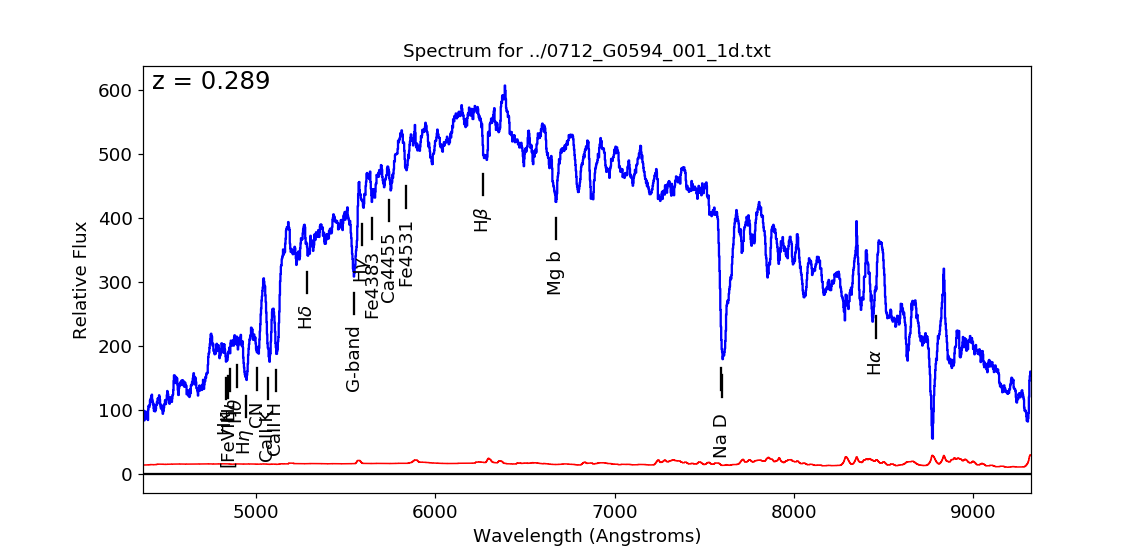


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       4833.75
[Fe VII]      3761.40       4848.44
H-iota        3770.00       4859.53
H-theta       3797.00       4894.33
H-eta         3835.00       4943.31
CN bandhd     3883.00       5005.19
CaII K        3933.67       5070.50
CaII H        3968.47       5115.36
H-delta       4101.00       5286.19
G-band        4305.00       5549.14
H-gamma       4340.00       5594.26
Fe4383        4383.00       5649.69
Ca4455        4455.00       5742.49
Fe4531        4531.00       5840.46
H-beta        4861.00       6265.83
Mg I (b)      5176.00       6671.86
Na I (D)      5889.95       7592.15
Na I (D)      5895.92       7599.84
H-alpha       6562.80       8459.45



In [102]:
data.smooth(11)
data.mark_lines('abs', z=0.289, usesmooth=True)


/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Limiting wavelength range for model sky to 3401.000 - 10389.950
Making model sky
--------------------------------------
Model starting wavelength: 3401.000000
Model ending wavelength:    10389.950000
Model dispersion:             0.698900
 Spectrum Start:  3401.00
 Spectrum End:    10389.80
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


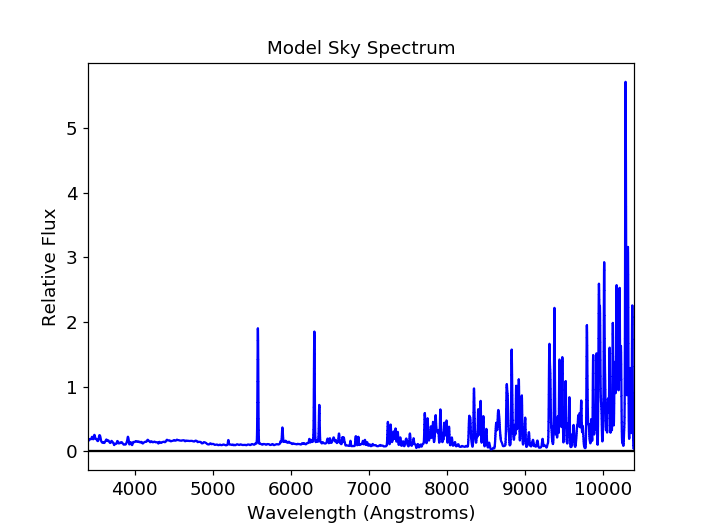

In [20]:
sky = spec1d.make_sky_model(sky_wav, doplot=True)

<IPython.core.display.Javascript object>


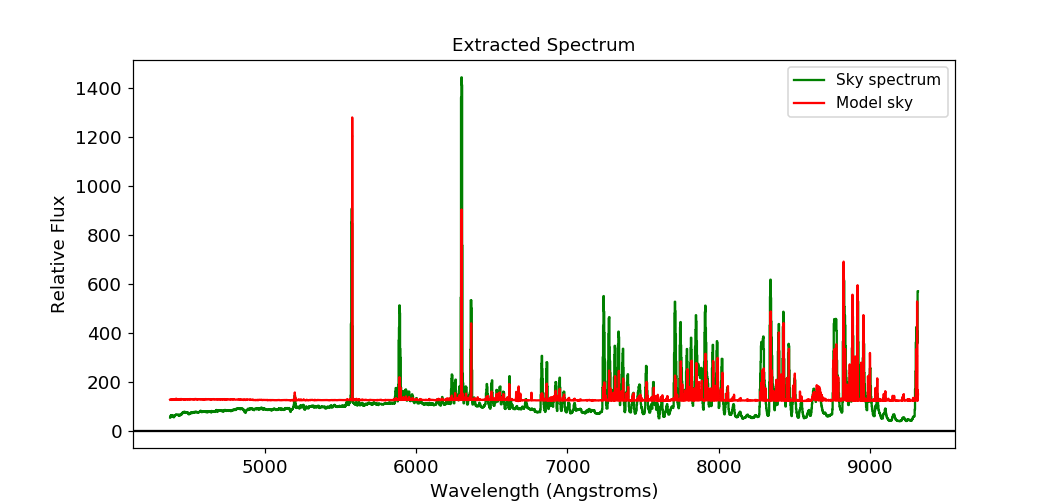


Smoothing sky spectrum with default value of  2.550 Ang

/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 4372.775663
Model ending wavelength:    9318.668335
Model dispersion:             1.969383
 Spectrum Start:  4372.78
 Spectrum End:     9318.58
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1544.4 23.49211668955705
129.60361681329422 0.18960612860387135


In [103]:
data.check_wavecal()

In [104]:
data['wav'] = wav_fit_6

In [105]:
print(data)

       wav           flux     var      sky 
------------------ ------- ---------- -----
 4079.244029514719  55.681  1793.5783  54.0
4083.3588644650854 135.212  1984.1689  56.0
4087.4634281344015  59.776  2008.1196  61.0
 4091.557766789899 132.477  2139.7124  61.0
4095.6419265537684  68.185   2107.677  64.0
 4099.715953403445  125.73  2056.4611  59.0
 4103.779893171895  74.753  1965.5178  59.0
 4107.833791547898  71.502  1985.4405  60.0
 4111.877694076333 185.189  2173.4484  59.0
  4115.91164615846 -26.694  1922.9044  64.0
               ...     ...        ...   ...
 9231.638681985532  77.052  1432.0939  59.0
 9233.373875685262  44.487  1368.1781  59.0
 9235.103185557784  38.993  1976.8146  87.0
  9236.82657976923 124.339  3947.2326 170.0
 9238.544026370386 122.027  5507.0568 242.0
 9240.255493296423  137.92  8161.0438 361.0
 9241.960948366628 173.732  9582.3369 423.0
 9243.660359284193 182.586  9586.3988 422.0
 9245.353693635887  69.859  9082.2354 408.0
 9247.040918891866 160.617  8100

<IPython.core.display.Javascript object>


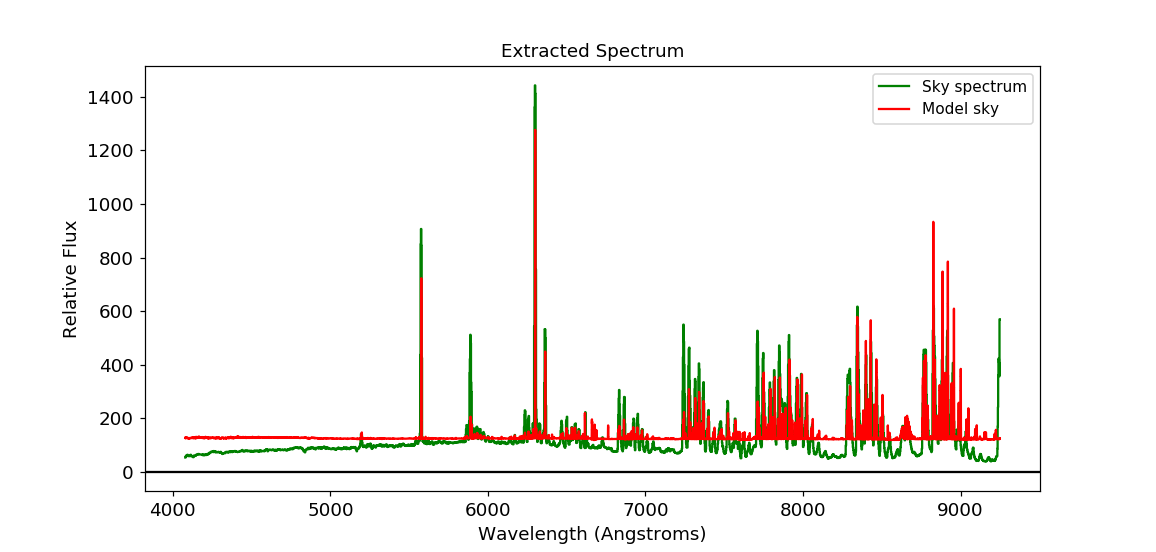


Smoothing sky spectrum with default value of  2.550 Ang

/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 4079.244030
Model ending wavelength:    9248.722002
Model dispersion:             4.114835
 Spectrum Start:  4079.24
 Spectrum End:     9248.64
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1544.4 16.91612526147648
129.60361681329422 0.18031657872099036


In [106]:
data.check_wavecal()

<IPython.core.display.Javascript object>


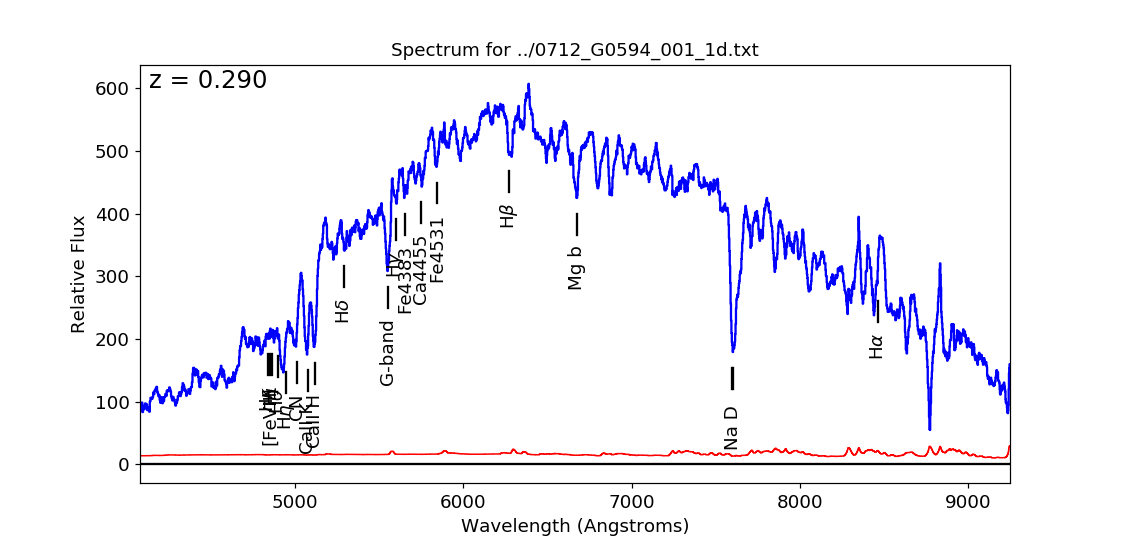


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       4837.50
[Fe VII]      3761.40       4852.21
H-iota        3770.00       4863.30
H-theta       3797.00       4898.13
H-eta         3835.00       4947.15
CN bandhd     3883.00       5009.07
CaII K        3933.67       5074.43
CaII H        3968.47       5119.33
H-delta       4101.00       5290.29
G-band        4305.00       5553.45
H-gamma       4340.00       5598.60
Fe4383        4383.00       5654.07
Ca4455        4455.00       5746.95
Fe4531        4531.00       5844.99
H-beta        4861.00       6270.69
Mg I (b)      5176.00       6677.04
Na I (D)      5889.95       7598.04
Na I (D)      5895.92       7605.74
H-alpha       6562.80       8466.01



In [109]:
data.smooth(11)
data.mark_lines('abs', z=0.290, usesmooth=True)

In [113]:
data.save('0712_G0594_001_1d_wav_calb.txt')


Saved spectrum to file 0712_G0594_001_1d_wav_calb.txt in format text
